In [802]:
import numpy as np
import matplotlib.pyplot as plt

In [803]:
# modelling the arrival process
# per second converyor belt
# c1 uses the distribution that tells us how likely the time of the next arrival
# a random value. 

In [804]:
# Exponential Random Number Algorithm
def poisson_est(mean):
    r=np.exp(-mean)
    N=0.0
    s=1.0
    s*=np.random.random()
    while s>r:
        N+=1
        s*=np.random.random()
    else:
        return int(N)

In [805]:
# total number of entities conveyor1 delivers per second for 1000 seconds
c1sample=[poisson_est(1)  for i in range(1000)]


In [806]:
# total entities conveyor belt delivers
totalc1=sum(c1sample)
totalc1

960

In [807]:
def conveyor2(time):
    # number of entities conveyor2 delivers over a given time
    return (int(time/1.5))
conveyor2(1000)

666

In [808]:
def failtime(frate,time):
    # per unit time
    time=time%100
    # cdf of failure 
    c_fail=1 - np.exp(-frate* time)
    if(c_fail>=np.random.random()):
        return time
    else: 
        return 0    

In [809]:
def failnow(frate,time):
    # prob of failure in next second
    p_fail=frate*np.exp(-frate*0)+ frate*np.exp(-frate*1)

    if(p_fail>=np.random.random()):
        return time
    else: 
        return 0 

In [810]:
f=np.array([failnow(0.01,time) for time in range(10000)])
(10000-sum(f==0)) /10000
# failtime=
f[f!=0]

array([ 143,  165,  168,  336,  409,  459,  508,  515,  534,  706,  707,
        709,  764,  774,  906,  929,  973,  979, 1102, 1166, 1299, 1304,
       1363, 1371, 1374, 1380, 1447, 1466, 1486, 1515, 1520, 1567, 1570,
       1596, 1649, 1692, 1694, 1717, 1753, 1809, 1824, 1834, 1999, 2084,
       2173, 2232, 2251, 2313, 2321, 2351, 2428, 2433, 2477, 2670, 2681,
       2706, 2719, 2733, 2796, 2841, 2868, 2977, 2982, 3020, 3049, 3098,
       3113, 3150, 3159, 3360, 3392, 3407, 3432, 3454, 3653, 3716, 3741,
       3782, 3847, 4015, 4131, 4168, 4207, 4224, 4286, 4301, 4372, 4411,
       4482, 4533, 4541, 4654, 4741, 4744, 4795, 4808, 4874, 4878, 4945,
       5021, 5084, 5136, 5159, 5168, 5191, 5197, 5331, 5336, 5357, 5379,
       5393, 5401, 5552, 5683, 5760, 5807, 5895, 5925, 6087, 6119, 6161,
       6225, 6339, 6414, 6439, 6463, 6471, 6529, 6573, 6589, 6663, 6683,
       6747, 6763, 6896, 6937, 7001, 7019, 7030, 7033, 7039, 7266, 7327,
       7342, 7402, 7409, 7449, 7456, 7463, 7464, 74

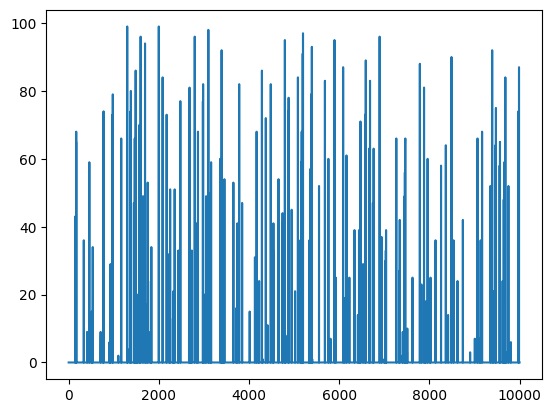

In [811]:
f=f%100
plt.plot(np.arange(0,10000),f)

In [812]:
# for each second, check the 
def simulate(time):
    C1event=[]
    stationFailures=[]
    completed=0
    downtime=0
    # stacks to count waiting entities at each conveyour belt C
    stackC1=[]
    stackC2=[]
    def stackpop(stackC1,stackC2):
        if stackC2[-1]==1:
            stackC2.pop()
        else:
            stackC2[-1]-=1 
        
        if stackC1[-1]==1:
            stackC1.pop() 
        else:
            stackC1[-1]==1
            
    def addtoC1(time_index,stackC1,C1event):
            if not stackC1:
                stackC1.append(C1event[time_index])
            else:
                print(time_index,C1event[time_index],stackC1[-1],stackC2)
                stackC1.append(C1event[time_index]+stackC1[-1])

    # add a entity to the stack every 1.5 seconds
    def addtoC2(time_index,stackC2):
        if (time_index==0):pass
        if time_index%1.5==0 or (time_index-0.5)%1.5==0:
            if len(stackC2)==0:
                stackC2.append(1)
            else:
                stackC2.append(stackC2[-1]+1)


# simulate events with respect to random variables
    for t in np.arange(time):
        C1event.append(poisson_est(1))
        stationFailures.append(failnow(0.01,t))

    for time_index in np.arange(time):
        if time_index>time-1:
            return completed
        
        addtoC1(time_index,stackC1,C1event)
        addtoC2(time_index,stackC2)

        # if both parts are ready
        if stackC1 and stackC2 and stackC1[-1]>0 and stackC2[-1]>0:
            # check if the machine is working
            if stationFailures[time_index]>0:
                for standyby in range(1,6):
                    curr=standyby+time_index
                    # conveyors run during downtime
                    addtoC1(curr,stackC1,C1event)
                    addtoC2(curr,stackC2)
                downtime+=5
                # machine fails close to the end of the testing time
                if time_index+5>=time-1:
                    return completed

                # count continues 5 seconds after
                time_index+=5
                stackpop(stackC1,stackC2)
            
                completed+=1
            else: #if the machine is working
                # do this or a while loop - while there are parts
                stackpop(stackC1,stackC2)
                completed+=1
        # print("\npost\nstackc2",stackC2,"\nstackc1",stackC1,'\ntime',time_index,'\n',completed,'\n\n')
    return completed,downtime

In [823]:
simulate(10)

1 0 0 [1]
2 2 0 [1]
3 4 2 [1, 1]
4 0 6 [1, 1, 1]
5 1 6 [1, 1]
6 2 7 [1, 1, 1]
7 2 9 [1, 1, 1, 1]
8 2 11 [1, 1, 1]
9 2 13 [1, 1, 1, 1]


(8, 0)

In [814]:
# will station1 do all work available instantly or one per unit time, while loop or one per iteration
# can parts + downtime> total time
# end behavior, produce or no
ls=[0,1]
ls.pop()
ls[-1]

0